0     10.000000
1     11.280330
2     12.626208
3     14.033189
4     15.496661
5     17.011910
6     18.574175
7     20.178692
8     21.820740
9     23.495670
10    25.198940
11    26.926137
12    28.672995
13    30.435418
14    32.209482
15    33.991456
16    35.777798
17    37.565166
18    39.350418
19    41.130608
20    42.902991
21    44.665016
22    46.414323
23    48.148739
24    49.866270
25    51.565099
26    53.243572
27    54.900200
28    56.533646
29    58.142717
dtype: float64


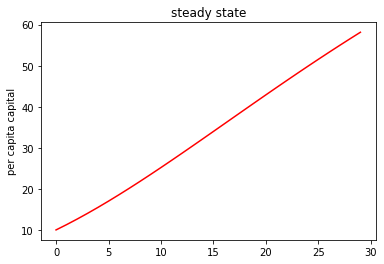

Text(0, 0.5, 'Total Income')

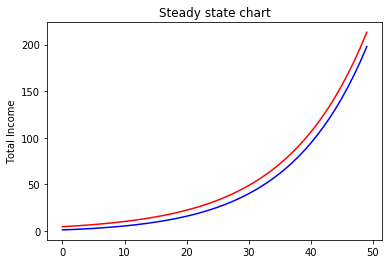

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
class Solow:
    def __init__(self, s, alpha, delta, n, g, k0, A0, L0):
        self.s = s
        self.alpha = alpha
        self.delta = delta
        self.n = n
        self.g = g
        self.kt = k0
        self.At = A0
        self.Lt = L0
    def RHS(self):
        return((self.s*(self.kt ** self.alpha) + (1 - self.delta)*self.kt) / ((1+self.g)*(1+self.n)))
    def iterate(self):
        self.kt = self.RHS()
        self.At = self.At * (1 + self.g)
        self.Lt = self.Lt * (1 + self.n)
    def simulate(self, steps):
        index = np.arange(1, steps + 1)
        seq_kt = []
        seq_At = []
        seq_Lt = []
        for i in index:
            seq_kt.append(self.kt)
            seq_At.append(self.At)
            seq_Lt.append(self.Lt)
            self.iterate()
        array = np.transpose(np.array([seq_kt, seq_At, seq_Lt]))
        self.path = array
    def steady(self):
        return((self.s / (self.g + self.n + self.delta + self.g * self.n)) ** (1 / (1 - self.alpha)))
    def output(self, steps, mode = "perworker"):
        self.simulate(steps)
        At = self.path[:,1]
        Lt = self.path[:,2]
        Kt = self.path[:,0] * ((At * Lt))
        Yt = (Kt ** (self.alpha)) * ((At * Lt) ** (1 - self.alpha))
        colnames = []
        if mode == "aggregate":
            self.df = np.transpose(np.array([Kt, Yt, At, Lt]))
            colnames = ["Kt", "Yt", "At", "Lt"]
        elif mode == "perworker":
            kt = Kt / Lt
            yt = Yt / Lt
            self.df = np.transpose(np.array([kt, yt, At, Lt]))
            colnames = ["kt", "yt", "At", "Lt"]
        self.df = pd.DataFrame(self.df, columns = colnames)
        return(self.df)

    
#s, alpha, delta, n, g, k0, A0, L0    
#steady state chart
ax, fig = plt.subplots()
a = Solow(0.5, 0.7, 0.1, 0, 0.02, 10, 10, 10).output(30, "aggregate")
i = np.arange(0,30)
kt = a['Kt'] / (a['At'] * a['Lt'])
plt.plot(i, kt, color = "red")
plt.ylabel("per capita capital")
plt.title("steady state")
print(kt)
pd.DataFrame.pct_change
plt.show()
b1 = Solow(0.5, 0.5, 0.01, 0.01, 0.08, 20, 1, 10).output(50, "aggregate")
b2 = Solow(0.5, 0.5, 0.01, 0.01, 0.08, 1, 1, 10).output(50, "aggregate")
i = np.arange(0,50)
yt1 = b1['Yt'] / b1['Lt']
yt2 = b2['Yt'] / b2['Lt']
plt.plot(i, yt1, color = "red")
plt.title("Steady state chart")
plt.plot(i, yt2, color = "blue")
plt.ylabel("Total Income")

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
class Solow:
    def __init__(self, s, alpha, delta, n, g, k0, A0, L0):
        self.s = s
        self.alpha = alpha
        self.delta = delta
        self.n = n
        self.g = g
        self.kt = k0
        self.At = A0
        self.Lt = L0
    def RHS(self):
        return((self.s*(self.kt ** self.alpha) + (1 - self.delta)*self.kt) / ((1+self.g)*(1+self.n)))
    def iterate(self):
        self.kt = self.RHS()
        self.At = self.At * (1 + self.g)
        self.Lt = self.Lt * (1 + self.n)
    def simulate(self, steps):
        index = np.arange(1, steps + 1)
        seq_kt = []
        seq_At = []
        seq_Lt = []
        for i in index:
            seq_kt.append(self.kt)
            seq_At.append(self.At)
            seq_Lt.append(self.Lt)
            self.iterate()
        array = np.transpose(np.array([seq_kt, seq_At, seq_Lt]))
        self.path = array
    def steady(self):
        return((self.s / (self.g + self.n + self.delta + self.g * self.n)) ** (1 / (1 - self.alpha)))
    def output(self, steps, mode = "perworker"):
        self.simulate(steps)
        At = self.path[:,1]
        Lt = self.path[:,2]
        Kt = self.path[:,0] * ((At * Lt))
        Yt = (Kt ** (self.alpha)) * ((At * Lt) ** (1 - self.alpha))
        colnames = []
        if mode == "aggregate":
            self.df = np.transpose(np.array([Kt, Yt, At, Lt]))
            colnames = ["Kt", "Yt", "At", "Lt"]
        elif mode == "perworker":
            kt = Kt / Lt
            yt = Yt / Lt
            diff= kt/At-self.steady()
            self.df = np.transpose(np.array([kt, yt, At, Lt, diff]))
            colnames = ["kt", "yt", "At", "Lt","diff"]
        self.df = pd.DataFrame(self.df, columns = colnames)
        return(self.df)
    def tkstar(self, steps, e):
        self.simulate(steps)
        At = self.path[:,1]
        Lt = self.path[:,2]
        Kt = self.path[:,0] * ((At * Lt))
        Yt = (Kt ** (self.alpha)) * ((At * Lt) ** (1 - self.alpha))
        kt = Kt / Lt
        diff = (kt/At)-self.steady()
        diff1=abs(diff)
        DIFFmorethane = diff1[diff1>e]
        tstar= len(DIFFmorethane)
        return(tstar)
    def aggregate_variable(self,t,kt0,A0,L0):
        list_kt = self.generate(t, kt0)
        list_Kt = []
        list_At = []
        list_Lt = []
        list_Yt = []
        # create lists of aggregate variables
        for kts in list_kt:
            Kt0 = kts*A0*L0
            list_Kt.append(Kt0)
            Yt0 = (Kt0**self.alpha)*(A0*L0)**(1-self.alpha)
            list_Yt.append(Yt0)
            list_At.append(A0)
            At = (1+self.g)*A0
            A0 = At
            list_Lt.append(L0)
            Lt = (1+self.n)*L0
            L0 = Lt
            
        
        raw_aggregate = np.array([list_Kt, list_At, list_Lt, list_Yt,list_kt])
        aggregate = np.transpose(raw_aggregate)
        return aggregate
    
    
    def per_worker_variable(self,t,kt0,A0,L0):
        list_kt = self.generate(t, kt0)
        aggregate = self.aggregate_variable(t,kt0,A0,L0)
        
        list_kt = aggregate[:,4]
        list_Lt_pw = aggregate[:,2]
        list_Kt_pw = aggregate[:,0]/list_Lt_pw
        list_At_pw = aggregate[:,1]/list_Lt_pw
        list_Yt_pw = aggregate[:,3]/list_Lt_pw
        
        pw = np.transpose(np.array([list_Kt_pw,list_At_pw,list_Lt_pw,list_Yt_pw,list_kt]))
        row = []
        n = 0
        for time in range(t):
            n += 1
            row.append(n)
            
        output = pd.DataFrame(pw, row, columns = ["Kt per worker", "At per worker", "Lt", "Yt per worker", "kt"])
        return output
alpha = 0.7
delta = 0.1
g = 0.02
t = 100
s = 0.5
n = 0
A0 = 1
L0 = 1
k0 = 1    
​
#Simulations:
instance = Solow(n, s, delta, alpha, g)
print(instance.RHS(k0))
print(instance.set_kt(k0))
print(instance.generate(10, 1))
print(instance.aggregate_variable(10,1,1,10))
print(instance.per_worker_variable(10,1,1,10))

s = 0.2
alpha = 0.7
delta = 0.1
n = 0.01
g = 0.02
k0 = 1
A0 = 10
L0 = 10
x=Solow(s, alpha, delta, n, g, k0, A0, L0)

ax,fig=plt.subplots()
​
time = np.arange(0,t)
savings = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
print(savings)
yts_for_different_savings = []
kts_for_different_savings = []
colors = ["blue", "green", "black", "purple", "red", "orange"]
for saving in savings:
    yt = Solow(saving, alpha, delta, n, g, k0, A0, L0).output(t, "perworker")["yt"].tolist()
    kt = Solow(saving, alpha, delta, n, g, k0, A0, L0).output(t, "perworker")["kt"].tolist()
    #2D arrays with different yts across time with different saving rates
    kts_for_different_savings.append(kt)
    #2D arrays with different kts across time with different saving rates
    yts_for_different_savings.append(yt)
    #plot the graphs
​
​
​
for n in range(6):
        #plot different yts against time
        plt.plot(time, kts_for_different_savings[n],color = colors[n], label = "s = " + str(savings[n]))
plt.xlabel("time, t")
plt.ylabel("per capita output, kt")
plt.title("Simulation for different growth rates")
plt.legend(loc = 9)
plt.show()
for n in range(6):
       #plot different kts against time
        plt.plot(time, yts_for_different_savings[n],color = colors[n], label = "s = " + str(savings[n]))
plt.xlabel("time, t")
plt.ylabel("per capita output, yt")
plt.title("Simulation for different growth rates")
plt.legend(loc = 9)
plt.show()

#steady state chart
        
s = 0.2
alpha = 0.7
delta = 0.1
n = 0.01
g = 0.02
k0 = 1
A0 = 10
L0 = 10
​
ax1, fig1 = plt.subplots()
​
a = Solow(s, alpha, delta, n, g, k0, A0, L0).output(100, "aggregate")
i = np.arange(0,100)
kt = a['Kt'] / (a['At'] * a['Lt'])
​
plt.xlabel("time, t")
plt.ylabel("output per effective worker, yt")
plt.title("Base model with standard values")
​
plt.plot(i, kt, color = "red")
plt.savefig("base_model.png")
​
print(Solow(s, alpha, delta, n, g, k0, A0, L0).tkstar(200, 0.1))
​
plt.show()
​
​
#convergence chart
​
ax2, fig2 = plt.subplots()
​
b1 = Solow(s, alpha, delta, n, g, 20, A0, L0).output(100, "aggregate")
b2 = Solow(s, alpha, delta, n, g, k0, A0, L0).output(100, "aggregate")
i = np.arange(0,100)
yt1 = b1['Yt'] / b1['Lt']
yt2 = b2['Yt'] / b2['Lt']
​
plt.plot(i, yt1, color = "red", label = "k0 = 20")
plt.plot(i, yt2, color = "blue", label = "k0 = 1")
​
plt.xlabel("time, t")
plt.ylabel("per capita output, yt")
plt.title("Convergence with different initial capital stocks")
plt.legend(loc = 9)
​
plt.savefig("Convergence_yt.png")
plt.show()
​
​
ax3, fig3 = plt.subplots()
​
i = np.arange(0,500)
​
b1 = Solow(s, alpha, delta, n, g, 20, A0, L0).output(500, "aggregate")
b2 = Solow(s, alpha, delta, n, g, k0, A0, L0).output(500, "aggregate")
​
yt1 = b1['Yt'] / b1['Lt']
yt2 = b2['Yt'] / b2['Lt']
​
yt_diff = yt1 - yt2
​
plt.plot(i, yt_diff, color = "grey")
​
plt.xlabel("time, t")
plt.ylabel("difference in per capita output")
plt.title("Convergence with different initial capital stocks")
​
plt.savefig("Convergence_yt_diff.png")
plt.show()
​
​
#growth graphs
​
ax4, fig4 = plt.subplots()
​
i = np.arange(0,100)
​
g_rates = [0, 0.01, 0.02, 0.03, 0.04]
df_list = []
colors = ['red', 'blue', 'green', 'orange', 'grey']
​
for G in g_rates:
    df_list.append(Solow(s, alpha, delta, n, G, k0, A0, L0).output(100, "aggregate"))
    print(Solow(s, alpha, delta, n, G, k0, A0, L0).tkstar(200, 0.1))
​
x = 0
for df in df_list:
    kt = df['Kt'] / (df['Lt'] * df['At'])
    plt.plot(i, kt, color = colors[x], label = "g = " + str(g_rates[x]))
    x += 1
​
plt.xlabel("time, t")
plt.ylabel("per capita output, yt")
plt.title("Simulations for differing growth rates")
plt.legend(loc = 2)
​
plt.savefig("kt_per_growth_rate.png")
plt.show()
​
​
ax5, fig5 = plt.subplots()
​
i = np.arange(0,100)
​
g_rates = [0, 0.01, 0.02, 0.03, 0.04]
df_list = []
colors = ['red', 'blue', 'green', 'orange', 'grey']
​
for G in g_rates:
    df_list.append(Solow(s, alpha, delta, n, G, k0, A0, L0).output(100, "aggregate"))
​
x = 0
for df in df_list:
    yt = df['Yt'] / df['Lt']
    plt.plot(i, yt, color = colors[x], label = "g = " + str(g_rates[x]))
    x += 1
    
plt.xlabel("time, t")
plt.ylabel("per capita output, yt")
plt.title("Simulations for differing growth rates")
plt.legend(loc = 9)
​
plt.savefig("yt_per_growth_rate.png")
plt.show()

fig, ax = plt.subplots()
a1 = Solow(s, alpha, delta, n, g, 1, A0, L0).output(100, "aggregate")
a2 = Solow(s, alpha, delta, n, g, 2, A0, L0).output(100, "aggregate")
a3 = Solow(s, alpha, delta, n, g, 3, A0, L0).output(100, "aggregate")
a4 = Solow(s, alpha, delta, n, g, 4, A0, L0).output(100, "aggregate")
a5 = Solow(s, alpha, delta, n, g, 5, A0, L0).output(100, "aggregate")
i = np.arange(0,100)
kt1 = a1['Kt'] / (a1['At'] * a1['Lt'])
kt2 = a2['Kt'] / (a2['At'] * a2['Lt'])
kt3 = a3['Kt'] / (a3['At'] * a3['Lt'])
kt4 = a4['Kt'] / (a4['At'] * a4['Lt'])
kt5 = a5['Kt'] / (a5['At'] * a5['Lt'])
​
ax.set_title("Steady state chart with varying levels of k0")
ax.set_xlabel("Time")
ax.set_ylabel("Capital in per efficiency-work units")
ax.plot(i, kt1, color = "red", label = "k0 = 1")
ax.plot(i, kt2, color = "orange", label = "k0 = 2")
ax.plot(i, kt3, color = "yellow", label = "k0 = 3")
ax.plot(i, kt4, color = "green", label = "k0 = 4")
ax.plot(i, kt5, color = "blue", label = "k0 = 5")
plt.legend(loc=4)
default = Solow(s, alpha, delta, n, g, k0, A0, L0)
print("Given the parameters, the steady state is", default.steady())
​
​
#output per worker chart: comparison between the "default" situation and Singapore
fig, bx = plt.subplots()
bx.set_title("Output per efficiency-work unit against time")
bx.set_xlabel("Time")
bx.set_ylabel("Output per efficiency-work unit")
i = np.arange(0,100)
​
#Generate output per worker chart using default variables
​
b1 = Solow(s, alpha, delta, n, g, k0, A0, L0).output(100, "aggregate")
ytdefault = b1['Yt'] / (b1['At'] * b1['Lt'])
​
#Generate output per worker chart using Singapore's variables
​
b2 = Solow(0.5, 0.7, 0.1, 0.005, 0.1, 0.5, 12, 6).output(100, "aggregate")
ytsg = b2['Yt'] / (b2['At'] * b2['Lt'])
​
bx.plot(i, ytdefault, color = "black", label = "Default")
bx.plot(i, ytsg, color = "red", label = "Singapore")
plt.legend(loc=2)
​
#Output per worker chart: The impact of the virus
fig, cx = plt.subplots()
cx.set_title("Simulation: An epidemic reducing efficiency and labour force size by 20% at time t = 0")
cx.set_xlabel("Time")
cx.set_ylabel("Output per capita")
i = np.arange(0,100)
​
#Output per capita if country has not been badly hit by virus at time t = 0
c1 = Solow(s, alpha, delta, n, g, k0, L0, A0).output(100, "aggregate")
yt_healthy = c1['Yt'] / c1['Lt']
​
#Output per capita if country has been badly hit by virus at time t = 0
#Both efficiency and labour force size reduced by 20%
c2 = Solow(s, alpha, delta, n, g, k0, 0.8 * L0, 0.2 * A0).output(100, "aggregate")
yt_virus = c2['Yt'] / c2['Lt']
​
cx.plot(i, yt_virus, color = "red", label = "Effect of an Epidemic Badly Affecting Labour Force")
cx.plot(i, yt_healthy, color = "black", label = "No Epidemic")
plt.legend(loc=2)
​
print(Solow(0.5, 0.7, 0.1, 0.005, 0.1, 0.5, 12, 6).tkstar(250, 0.1))
print(Solow(s, alpha, delta, n, g, k0, 0.8*L0, 0.8*A0).tkstar(250, 0.1))
​
#Year-on-year percentage change in output per capita when there is no epidemic
fig, dx = plt.subplots()
dx.set_title("Year-on-year % change in output per capita: An epidemic reducing efficiency and labour force size by 20% at time t = 0")
dx.set_xlabel("Time")
dx.set_ylabel("% Change in output per capita")
dx.plot(i, yt_virus.pct_change(), color = "red", label = "Effect of an Epidemic Badly Affecting Labour Force")
dx.plot(i, yt_healthy.pct_change(), color = "black", label = "No Epidemic")
plt.legend(loc=2)
plt.close()





4.182122066996046
83
